# CatBoost
CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. It is developed by Yandex researchers and engineers. CatBoost name comes from two words Category and Boosting. CatBoost supports numerical, categorical, and text features but has a good handling technique for categorical data.<br>
In CatBoost, we use symmetric binary trees.<br>
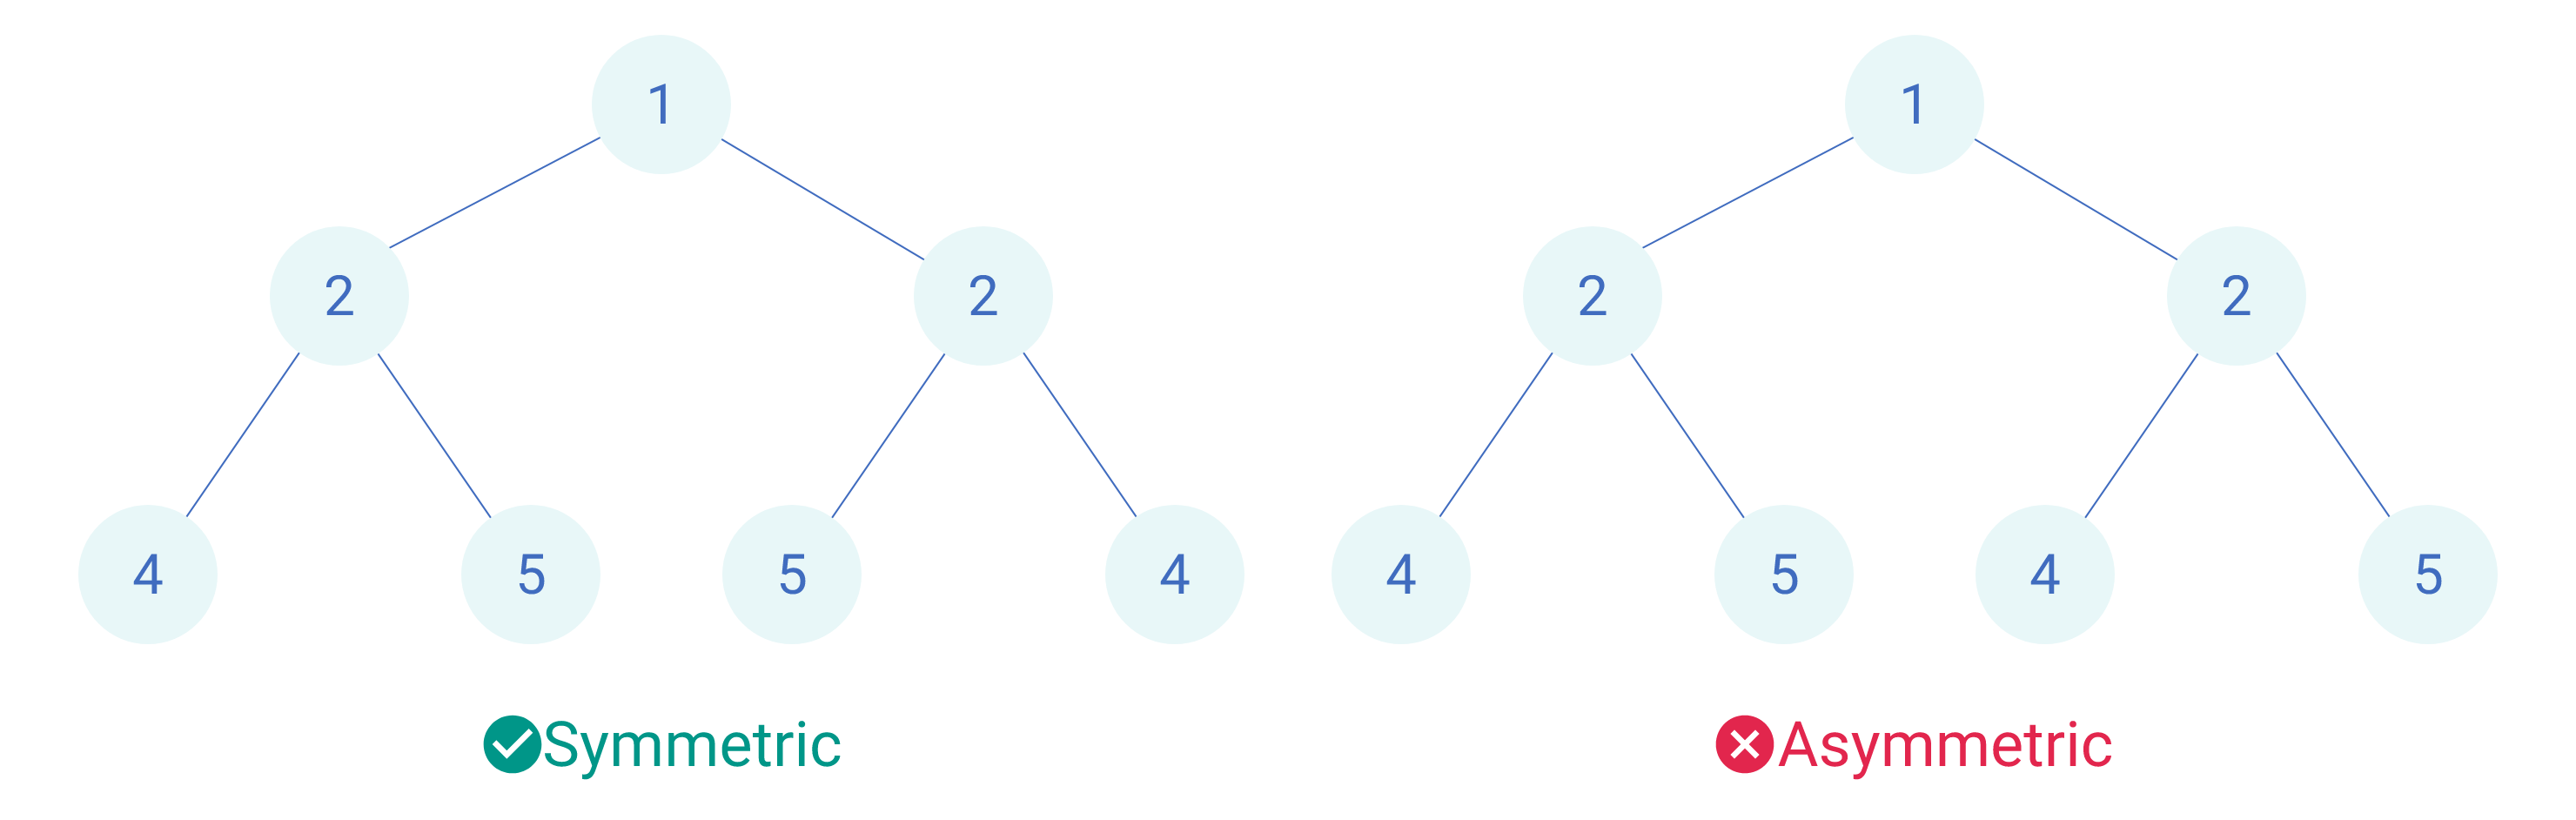<br>
[Image source](https://workat.tech/problem-solving/practice/symmetric-binary-tree)

### Gradient boosting
The main idea of boosting is to sequentially combine many weak models and create a strong model.<br>
Gradient boosting is a type of machine learning algorithm. It is an iterative algorithm. It is based on decision trees. So you built one decision tree then after that you built another decision tree to minimize the error. And then you keep repeating.<br>
Gradient boosting approach can use for both the regression and classification problems. There are three components involved in gradient boosting:
* Optimized loss function.
* Lousy indicator learner.
* An additive model that reduces failure cases.

### Categorical feature
A categorical feature is a feature that is having a discrete set of values that are not necessarily comparable with each other. For example: race, sex, age group, and educational level.

## Features of CatBoost
* Categorical features support
* Fast and scalable GPU version
* Reduces the need for hyper parameter tuning
* Fast prediction
* Accuracy

## Applications
* Medicine
* Finance
* Sales prediction
* Music and video recommendations
* Weather prediction
* Self-driving cars

### CatBoost provides three different estimators:

* CatBoost - It can handle both classification and regression datasets.
* CatBoostRegressor - It works with regression datasets.
* CatBoostClassifier - It works with classification datasets.

## Catboost implementation
I will be using wine dataset from sklearn.datasets<br>
It is a classification dataset which has information about ingredients used in three different types of wines.

In [1]:
pip install catboost

In [2]:
import catboost as cb
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [5]:
df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
df["WineType"] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
WineType                        0
dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(wine.data, wine.target, train_size=0.8, stratify=wine.target, random_state=123)

In [8]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100)

In [9]:
model.fit(X_train, Y_train, eval_set=(X_test, Y_test))

Learning rate set to 0.25025
0:	learn: 0.8832180	test: 0.9093415	best: 0.9093415 (0)	total: 51.2ms	remaining: 5.07s
1:	learn: 0.7294328	test: 0.7675544	best: 0.7675544 (1)	total: 57.3ms	remaining: 2.81s
2:	learn: 0.6154153	test: 0.6567618	best: 0.6567618 (2)	total: 63.8ms	remaining: 2.06s
3:	learn: 0.5175770	test: 0.5663444	best: 0.5663444 (3)	total: 67.5ms	remaining: 1.62s
4:	learn: 0.4386694	test: 0.4924629	best: 0.4924629 (4)	total: 69.5ms	remaining: 1.32s
5:	learn: 0.3876892	test: 0.4444561	best: 0.4444561 (5)	total: 72.7ms	remaining: 1.14s
6:	learn: 0.3441555	test: 0.4069582	best: 0.4069582 (6)	total: 75.8ms	remaining: 1.01s
7:	learn: 0.3154332	test: 0.3860149	best: 0.3860149 (7)	total: 78.8ms	remaining: 907ms
8:	learn: 0.2792345	test: 0.3542647	best: 0.3542647 (8)	total: 82ms	remaining: 829ms
9:	learn: 0.2485120	test: 0.3223563	best: 0.3223563 (9)	total: 85.6ms	remaining: 770ms
10:	learn: 0.2235601	test: 0.3086177	best: 0.3086177 (10)	total: 88.6ms	remaining: 717ms
11:	learn: 0.2

In [10]:
model.set_feature_names(wine.feature_names)

In [11]:
test_preds = model.predict(X_test)

In [12]:
test_preds

array([[1],
       [0],
       [1],
       [2],
       [2],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2]])

In [13]:
print("Test Accuracy: %.2f"%model.score(X_test, Y_test))

Test Accuracy: 0.97


In [14]:
from sklearn import metrics
print(metrics.classification_report(Y_test, test_preds, target_names=wine.target_names))
print(metrics.confusion_matrix(Y_test, test_preds))

              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


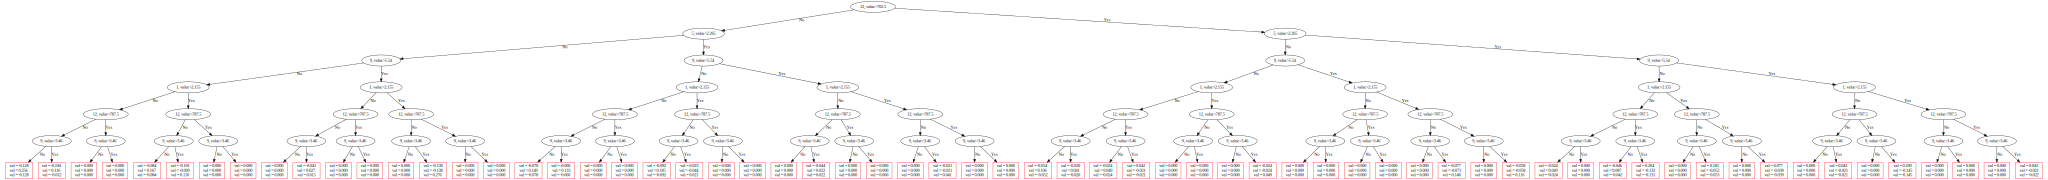

In [15]:
model.plot_tree(1)

## Comparison with other boosting libraries
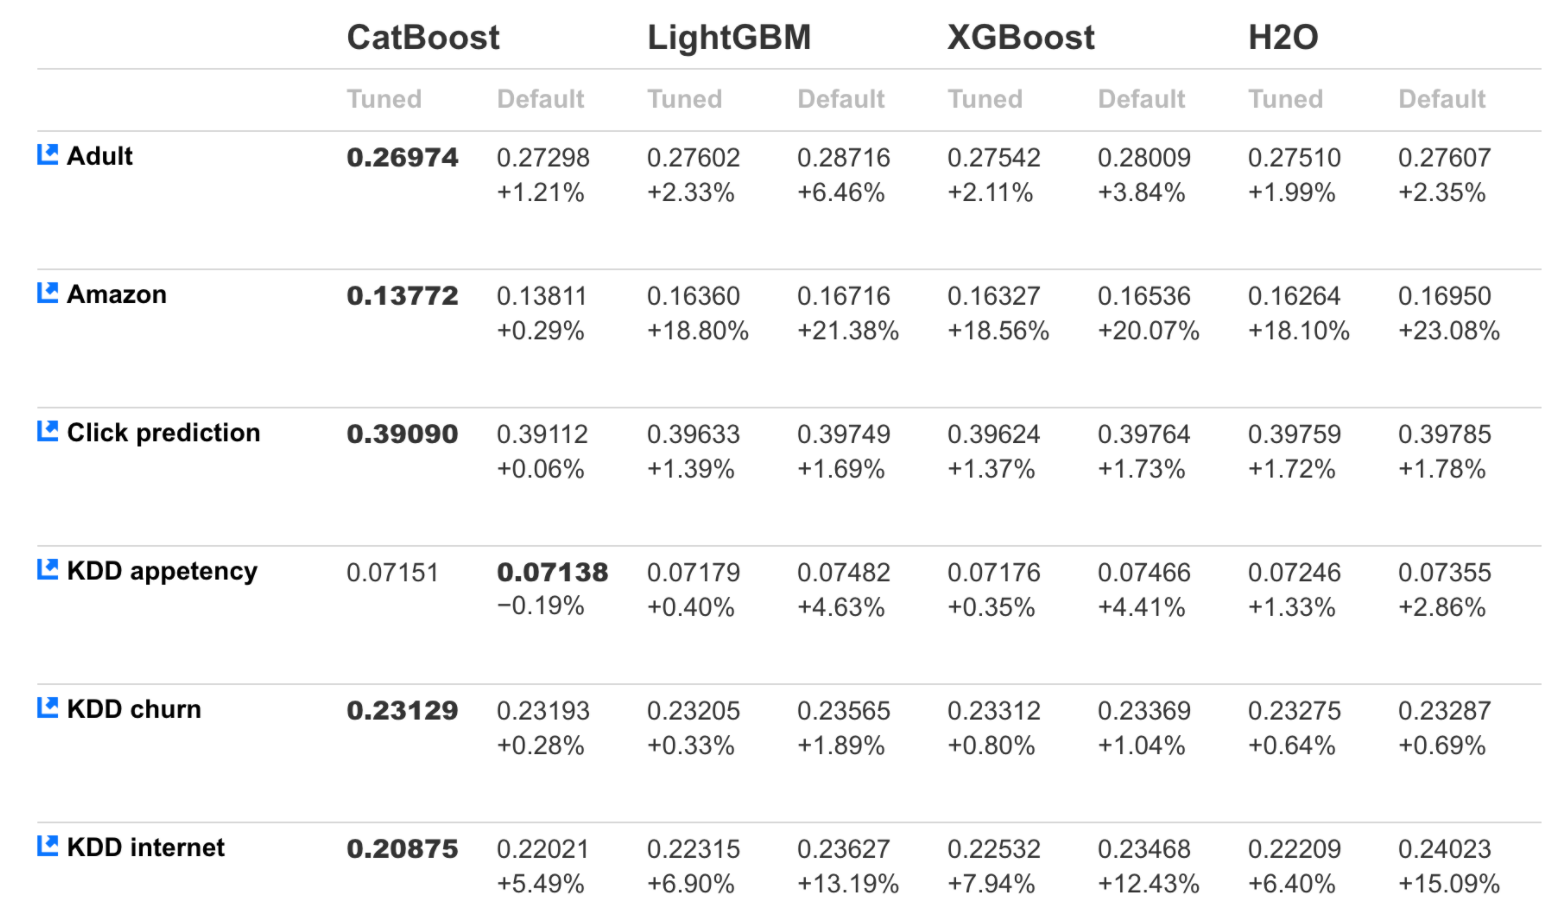<br>
[Image source](https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/)

## Summary
Catboost is an open-source machine learning library that provides a fast and reliable implementation of gradient boosting on decision trees algorithm. <br>
In this task I used wine classification dataset to demonstrate CatBoost. CatBoost takes less prediction time and it helps to reduce overfitting and improves the quality of the model.

#### References:
* https://catboost.ai/
* https://dataaspirant.com/gradient-boosting-algorithm/
* https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab
* https://setscholars.net/how-to-classify-wine-using-different-boosting-ensemble-models-e-g-xgboost-catboost-lightgbm-multiclass-classification-in-python/